In [1]:
import tensorflow as tf
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [48]:
# for checking keras
!pip install keras==2.12.0


In [2]:
## keras have one method
# internally it use generator concept which is there in python -to load something in memory 
## keet it --- remove it
## when give it 1gb of data that time our system get crash also that why we we use keras  invild fuction

train = keras.utils.image_dataset_from_directory(
    directory =r'C:\Users\HP\Downloads\Dog_and_cat_data\train',
    batch_size = 32,
    image_size = (256,256),
    labels = "inferred",
    label_mode = "int"


)

validation_ds = keras.utils.image_dataset_from_directory(
    directory =r'C:\Users\HP\Downloads\Dog_and_cat_data\test',
    batch_size = 32,
    image_size = (256,256),
    labels = "inferred",
    label_mode = "int"

)


Found 20000 files belonging to 2 classes.
Found 5002 files belonging to 3 classes.


In [ ]:
for i in train:
    print(i)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[5.15278015e+01, 5.65278015e+01, 5.95278015e+01],
         [5.43439636e+01, 5.93439636e+01, 6.23439636e+01],
         [5.85606079e+01, 6.35606079e+01, 6.65606079e+01],
         ...,
         [4.44101562e+01, 3.71054688e+01, 3.12578125e+01],
         [4.62617188e+01, 4.18789062e+01, 3.61875000e+01],
         [4.38750000e+01, 4.24140625e+01, 3.74140625e+01]],

        [[5.23993835e+01, 5.73993835e+01, 6.03993835e+01],
         [4.61580200e+01, 5.11580200e+01, 5.41580200e+01],
         [4.98992615e+01, 5.48992615e+01, 5.78992615e+01],
         ...,
         [4.78867188e+01, 3.97226562e+01, 3.40000000e+01],
         [4.90353699e+01, 4.37931824e+01, 3.76171875e+01],
         [4.72293091e+01, 4.40312500e+01, 3.71302795e+01]],

        [[7.85957642e+01, 8.35957642e+01, 8.65957642e+01],
         [6.89591675e+01, 7.39591675e+01, 7.69591675e+01],
         [5.44862976e+01, 5.94862976e+01, 6.24862976e+01],
         ...,
         

In [ ]:
def process(image,label):
    image = tf.cast(image/255, tf.float32)
    return image,label

train=train.map(process)
validation_ds=validation_ds.map(process)


In [5]:
train =train/255.
validation_ds = validation_ds/255.

TypeError: unsupported operand type(s) for /: '_BatchDataset' and 'float'

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32,kernel_size=(3,3),padding = "valid",activation = "relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size =(2,2),strides = 2 , padding = "valid"))
          
model.add(Conv2D(64,kernel_size=(3,3),padding = "valid",activation = "relu" ))
model.add(MaxPooling2D(pool_size =(2,2),strides = 2 , padding = "valid"))

model.add(Conv2D(128,kernel_size=(3,3),padding = "valid",activation = "relu"))
model.add(MaxPooling2D(pool_size =(2,2),strides = 2 , padding = "valid"))


# convert data into 1D array and make Ann
model.add(Flatten())
model.add(Dense(128,activation = "relu"))
model.add(Dense(64,activation = "relu"))
# this is for output alayer
model.add(Dense(1,activation = "sigmoid"))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics= ["accuracy"])

In [11]:
model.fit(train,epochs = 2,validation_data = validation_ds)

Epoch 1/2
625/625 [==============================] - 1339s 2s/step - loss: 0.6728 - accuracy: 0.5889 - val_loss: 0.6124 - val_accuracy: 0.6596
Epoch 2/2
625/625 [==============================] - 928s 1s/step - loss: 0.5472 - accuracy: 0.7204 - val_loss: 0.5211 - val_accuracy: 0.7524


In [19]:
import matplotlib.pyplot as plt
image1 =plt.imread(r"C:\Users\HP\Downloads\Dog_and_cat_data\test\for test\dog.jpg")

In [14]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/a3/d2/4ce53fc825adfb38b97d91aa1bb99df7b10637c0044302807c00cdee3ad5/matplotlib-3.7.3-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/96/1b/b05cd42c8d21767a0488b883b38658fb9a45f86c293b7b42521a8113dc5d/contourpy-1.1.1-cp38-cp38-win_amd64.whl.metadata
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/ee/d1/405b6d7a84cfd43cad518bf3d243433d637ada0add65e93110f5f480f86a/fonttools-4.42.1-cp38-cp38-win_amd64.whl.metadata
     ---------------------------------------- 0.0/154.1 kB ? eta -:--:--
     ------- ----------------------------- 30.7/154.1 kB 660.6 kB/s eta 0:00:01
     ------- ----------------------------- 30.7/154.1 kB 660.6 kB/s eta 0:00:01
     ------- ----------------------------- 30.7/154.1 kB 660.6 k

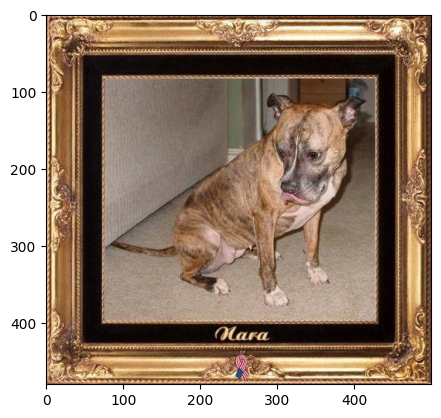

In [21]:
plt.imshow(image1)

In [22]:
image2 =plt.imread(r"C:\Users\HP\Downloads\Dog_and_cat_data\test\for test\cat.jpg")

In [23]:
image2

array([[[ 81,  82,  68],
        [ 85,  86,  72],
        [ 91,  89,  76],
        ...,
        [152, 142, 150],
        [151, 141, 149],
        [150, 140, 148]],

       [[ 85,  83,  70],
        [ 88,  86,  73],
        [ 92,  90,  77],
        ...,
        [152, 142, 150],
        [151, 141, 149],
        [150, 140, 148]],

       [[ 88,  84,  72],
        [ 91,  87,  75],
        [ 93,  89,  77],
        ...,
        [152, 142, 150],
        [151, 141, 149],
        [150, 140, 148]],

       ...,

       [[ 59,  53,  41],
        [ 54,  48,  36],
        [ 50,  44,  32],
        ...,
        [ 65,  55,  56],
        [ 63,  53,  54],
        [ 58,  48,  49]],

       [[ 57,  51,  39],
        [ 51,  45,  33],
        [ 47,  41,  29],
        ...,
        [ 59,  49,  50],
        [ 60,  50,  51],
        [ 57,  47,  48]],

       [[ 51,  45,  33],
        [ 47,  41,  29],
        [ 43,  37,  25],
        ...,
        [ 57,  47,  48],
        [ 59,  49,  50],
        [ 55,  45,  46]]

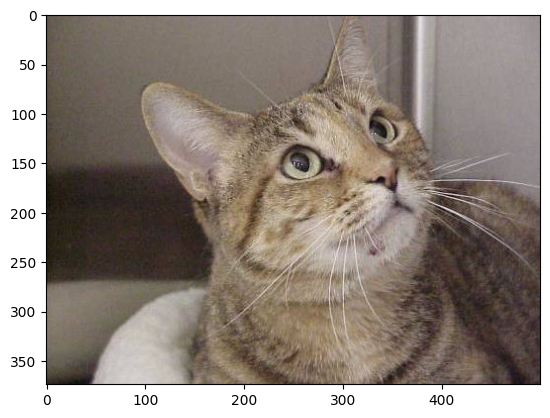

In [24]:
plt.imshow(image2)

In [25]:
image1.shape

(480, 500, 3)

In [26]:
image2.shape

(374, 500, 3)

In [27]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/fb/c4/f574ba6f04e6d7bf8c38d23e7a52389566dd7631fee0bcdd79ea07ef2dbf/opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.1 MB 3.1 MB/s eta 0:00:13
    --------------------------------------- 0.7/38.1 MB 6.0 MB/s eta 0:00:07
   - -------------------------------------- 1.0/38.1 MB 7.2 MB/s eta 0:00:06
   - -------------------------------------- 1.5/38.1 MB 7.3 MB/s eta 0:00:05
   - -------------------------------------- 1.8/38.1 MB 7.7 MB/s eta 0:00:05
   -- ------------------------------------- 2.2/38.1 MB 7.4 MB/s eta 0:00:05
   -- ------------------------------------- 2.6/38.1 MB 7.4 MB/s eta 0:00:05
   -- ------------------------------------- 2.8/38.1 MB 7.2 MB/s eta 0:00:05
   --- ----------------

In [28]:
import cv2

In [40]:
dog_resize_img=cv2.resize(image1,(256,256))
cat_resize_img=cv2.resize(image2,(256,256))

In [41]:
dog_resize_img.shape

(256, 256, 3)

In [42]:
cat_resize_img.shape

(256, 256, 3)

In [43]:
dog_resize_img=dog_resize_img.reshape((1,256,256,3))
dog_resize_img.shape

(1, 256, 256, 3)

In [44]:
cat_resize_img=cat_resize_img.reshape((1,256,256,3))
cat_resize_img.shape

(1, 256, 256, 3)

In [45]:
model.predict(cat_resize_img)

1/1 [==============================] - 0s 48ms/step


array([[4.7393478e-32]], dtype=float32)

In [46]:
model.predict(dog_resize_img)

1/1 [==============================] - 0s 50ms/step


array([[0.]], dtype=float32)